In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures


data = np.loadtxt('ex2data1.txt', delimiter = ',')

In [2]:
X = np.c_[np.ones([data.shape[0],1]),data[:,0:2]];
y = data[:,2].reshape([X.shape[0],1])

In [3]:
def mapp(cc):
    if(cc==0.): return 'g'
    if(cc==1.): return 'r'
coll=[mapp(cc) for cc in y[:,0]]

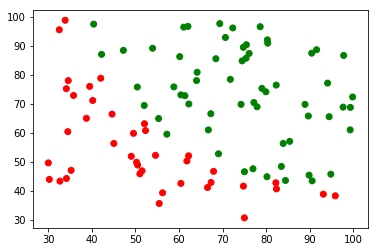

In [4]:
col = ['red','green']
#plt.scatter(X[:,0],X[:,1],c = coll)
plt.scatter(X[:,1],X[:,2],c = list(y[:,0]),cmap=mpl.colors.ListedColormap(col));

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def computeCost(theta,X,y):
    m = y.size;
    h = sigmoid(X.dot(theta))
    cost = 1/m*(-y.T.dot(np.log(h))- (1-y).T.dot(np.log(1-h)))   
    
    if np.isnan(cost):
        return(np.inf)
    return cost

In [6]:
def gradient(theta,X,y):
    m = y.size;
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    gradient = 1/m*(X.T.dot(h-y))
    return gradient.ravel()

In [7]:
theta=np.zeros([X.shape[1]])
print(computeCost(theta,X,y))
print(gradient(theta,X,y))

[0.69314718]
[ -0.1        -12.00921659 -11.26284221]


In [8]:
result = minimize(computeCost, theta,args = (X,y), method = None, jac = gradient, options = {'maxiter':400})
theta = result.x.T

C:\Users\ABansal4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\ABansal4\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [9]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (res.x)
sigmoid(np.array([1, 45, 85]).dot(theta))

0.7762903249331023

In [10]:
p = predict(theta, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


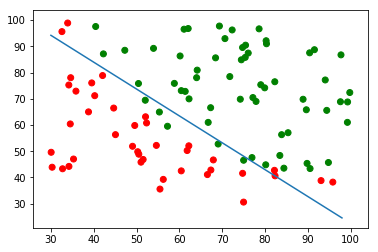

In [11]:
xx = range(int(min(X[:,1])), int(max(X[:,1])))
yy = (-theta[0]-theta[1]*xx)/theta[2]
plt.plot(xx,yy)
col = ['red','green']
#plt.scatter(X[:,0],X[:,1],c = coll)
plt.scatter(X[:,1],X[:,2],c = list(y[:,0]),cmap=mpl.colors.ListedColormap(col));